In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.signal import lfilter, butter
from itertools import product

In [2]:
import reconstructionutils as ru
import cutility as cu

In [201]:
from scipy.sparse.linalg import spsolve

In [268]:
def debug_retrieve_fit_coefficients(self, z: list):
        '''
        parameters:
            - <1d-array> z: target time series to be fitted to
        '''
        print('- DEBUG function -')
        debug_output_a = ''
        
        polynominal_exponents = cu.polynominal(self.dimension, self.grade)
    
        len_polynominal = len(polynominal_exponents[0])
    
        a = np.ones((len_polynominal, len_polynominal))
        for i in range(len_polynominal):
            for j in range(len_polynominal):
                tmp = np.ones(np.shape(self.series[0]))
                for k in range(self.dimension):
                    y = self.series[k]
                    tmp *= y ** (polynominal_exponents[k][j] + polynominal_exponents[k][i])
                    
                    debug_output_a += '%i-' % ((polynominal_exponents[k][j] + polynominal_exponents[k][i]))
                    
                tmp *= self.weighting  # DEBUG: weighting here
                a[i][j] *= np.sum(tmp)
                
                debug_output_a += '| '
            debug_output_a += '\n'
        debug_output_b = ''
        
        b = np.ones((len_polynominal, 1))
        for i in range(len_polynominal):
            tmp = np.ones(np.shape(self.series[0]))
            for k in range(self.dimension):
                y = self.series[k]
                tmp *= y ** polynominal_exponents[k][i]
                
                debug_output_b += '%i-' % (polynominal_exponents[k][i])
            debug_output_b +='\n'
                
            tmp *= self.weighting  # DEBUG: weighting here
            b[i] *= np.sum(z * tmp)
            
        if DEBUG:
            print('a:')
            print(debug_output_a)
            print('A:')
            print(a == 0.)
            print('b:')
            print(debug_output_b)
            
        return np.linalg.solve(a, b)

In [269]:
# set model fuction new
ru.Model._retrieve_fit_coefficients = debug_retrieve_fit_coefficients

In [270]:
# harmonic oscillator system
t = np.linspace(0, 2 * np.pi, 1000)
x = np.cos(t) * 1 / (t + 3)
v = - np.sin(t) * 1 / (t + 3)

dx = v
dv = - x

<IPython.core.display.Javascript object>


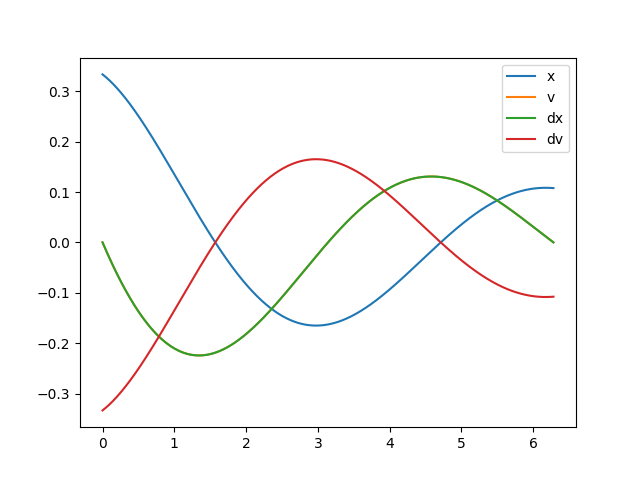

[]

In [271]:
%matplotlib notebook
plt.plot(t, x, label='x')
plt.plot(t, v, label='v')
plt.plot(t, dx, label='dx')
plt.plot(t, dv, label='dv')
plt.legend()
plt.plot()

In [272]:
series = [x, v]
derivates = [dx, dv]

In [315]:
weighting = np.ones(np.shape(series[0])) * 7.1365

In [316]:
system = ru.Model(series, 4
                  , derivates, weighting)

In [317]:
DEBUG = False

In [318]:
coefficients = (system._retrieve_fit_coefficients(dx), system._retrieve_fit_coefficients(dv))
coefficients

- DEBUG function -
- DEBUG function -


(array([[ 1.12773436e-09],
        [ 1.00000000e+00],
        [-6.93991989e-09],
        [-9.16877210e-10],
        [-3.83854365e-09],
        [-5.37070491e-08],
        [-2.79351325e-09],
        [-5.24151387e-08],
        [-4.32094194e-09],
        [ 1.93142336e-07],
        [-5.77118876e-08],
        [ 2.90076466e-07],
        [-5.92646529e-08],
        [ 9.51167512e-08]]),
 array([[-1.00000000e+00],
        [-7.05621968e-10],
        [ 1.39746964e-08],
        [ 1.71738867e-09],
        [ 7.69417277e-09],
        [ 1.08160890e-07],
        [ 4.48749969e-09],
        [ 1.05655162e-07],
        [ 7.65765742e-09],
        [-3.88951646e-07],
        [ 1.20044967e-07],
        [-5.85632891e-07],
        [ 1.23377614e-07],
        [-1.93117351e-07]]))

In [319]:
print(coefficients_[0] - coefficients[0])
print(coefficients_[1] - coefficients[1])

[[ 7.88679559e-10]
 [ 2.00687245e-10]
 [-4.84879480e-09]
 [-3.65640706e-10]
 [-2.62196944e-09]
 [-3.75437305e-08]
 [ 4.27826279e-10]
 [-3.68660621e-08]
 [-8.18315943e-10]
 [ 1.34988232e-07]
 [-4.83775464e-08]
 [ 2.06181749e-07]
 [-4.98877579e-08]
 [ 7.02012711e-08]]
[[-4.77256967e-09]
 [-1.42329213e-09]
 [ 2.93587001e-08]
 [ 3.30007399e-09]
 [ 1.60970818e-08]
 [ 2.27249864e-07]
 [ 6.77257384e-09]
 [ 2.22240880e-07]
 [ 1.36362998e-08]
 [-8.17172215e-07]
 [ 2.61206315e-07]
 [-1.23421983e-06]
 [ 2.68705371e-07]
 [-4.09868641e-07]]


In [110]:
# function to derive the polynominal exponents is incorrect

In [163]:
from itertools import combinations, permutations

In [175]:
def debug_polynominal(_, grade):
    if grade == 1:
        r = [[1., 0.],
             [0., 1.]]
    if grade == 2:
        r = [[1., 0., 2., 1., 0.],
             [0., 1., 0., 1., 2.]]
    if grade == 3:
        r = [[1., 0., 2., 1., 0., 3., 2., 1., 0.],
             [0., 1., 0., 1., 2., 0., 1., 2., 3.]]
    if grade == 4:
        r = [[1., 0., 2., 1., 0., 3., 2., 1., 0., 4., 3., 2., 1., 0.],
             [0., 1., 0., 1., 2., 0., 1., 2., 3., 0., 1., 2., 3., 4.]]
    
    return np.asarray(r)

In [176]:
print(debug_polynominal(2, 2))
#assert(debug_polynominal(2, 2) == [[1., 0., 2., 1., 0.], [0., 1., 2., 0., 1., 2.]])

[[1. 0. 2. 1. 0.]
 [0. 1. 0. 1. 2.]]


In [177]:
cu.polynominal = debug_polynominal

In [303]:
def polynominal(dimension, grade):
    ''' returns the exponents of a polynominal
        of a given dimension to a given grade.
    '''
    # terminal condition
    if grade == 1:
        return np.identity(dimension)
        
    # get all possible combinations of grade x dimension
    tmp = product(range(grade + 1), repeat=dimension)
    tmp = list(tmp)
    
    # remove all which do not match grade
    tmp_ = []
    for i in range(len(tmp)):
        if np.sum(tmp[i]) == grade:
            tmp_.append(list(tmp[i]))
    
    # convert to full numpy array
    tmp_ = np.asarray([np.asarray(el) for el in tmp_])
    
    return np.append(polynominal(dimension, grade - 1), tmp_.T, axis=1)

print(np.shape(polynominal(3, 4)))

(3, 34)


In [309]:
def debug_polynominal_3d(_, grade):
    if grade == 1:
        r = [[1., 0., 0.],
             [0., 1., 0.],
             [0., 0., 1.]]
    if grade == 2:  #   v
        r = [[1., 0., 0., 2., 1., 0., 1., 0., 0.],
             [0., 1., 0., 0., 1., 2., 0., 1., 0.],
             [0., 0., 1., 0., 0., 0., 1., 1., 2.]]
    if grade == 3:  #                           v
        r = [[1., 0., 0., 2., 1., 0., 1., 0., 0., 3., 2., 2., 1., 1., 1., 0., 0., 0., 0.],
             [0., 1., 0., 0., 1., 2., 0., 1., 0., 0., 1., 0., 1., 2., 0., 1., 2., 3., 0.],
             [0., 0., 1., 0., 0., 0., 1., 1., 2., 0., 0., 1., 1., 0., 2., 2., 1., 0., 3.]]
    if grade == 4:  #                                                                   v
        r = [[1., 0., 0., 2., 1., 0., 1., 0., 0., 3., 2., 2., 1., 1., 1., 0., 0., 0., 0., 4, 3, 3, 2, 2, 2, 1, 1, 1, 1, 0, 0, 0, 0, 0],
             [0., 1., 0., 0., 1., 2., 0., 1., 0., 0., 1., 0., 1., 2., 0., 1., 2., 3., 0., 0, 1, 0, 2, 0, 1, 3, 0, 2, 1, 3, 1, 2, 4, 0],
             [0., 0., 1., 0., 0., 0., 1., 1., 2., 0., 0., 1., 1., 0., 2., 2., 1., 0., 3., 0, 0, 1, 0, 2, 1, 0, 3, 1, 2, 1, 3, 2, 0, 4]]
    
    return np.asarray(r)